# 🛩️ Análise de Dados de Ocorrências Aeronáuticas - CENIPA

---

## **Projeto de Ciência de Dados End-to-End**
### *Da Análise Exploratória à Aplicação Web em Produção*

<br>

**👥 Autores:**
- Charlie Rodrigues Fonseca
- Elana Tanan Sande

**🏛️ Instituição:** Universidade Federal de Sergipe (UFS)  
**📚 Disciplina:** Tópicos de Inteligência Artificial 2025.1

**📅 Data:** Julho 2025

---

### 🎯 **Desafio de Ciência de Dados Di2win**

# 📋 1. Visão Geral e Objetivos do Projeto

---

## 🎯 **Objetivo Principal**
Desenvolver um **sistema completo de análise e predição** da gravidade de ocorrências aeronáuticas utilizando dados do CENIPA (Centro de Investigação e Prevenção de Acidentes Aeronáuticos).

---

## 🛠️ **Metodologia End-to-End**

### **Pipeline Completo de Ciência de Dados:**

1. **📥 ETL (Extract, Transform, Load)**
   - Extração e limpeza de dados de múltiplas fontes
   - Tratamento de valores ausentes e inconsistências
   - Unificação em dataset mestre

2. **🔍 EDA (Exploratory Data Analysis)**
   - Análise temporal das ocorrências
   - Distribuição geográfica dos eventos
   - Identificação de padrões por segmento da aviação

3. **🤖 Modelagem Preditiva**
   - Comparação de algoritmos (Random Forest vs XGBoost)
   - Otimização para minimizar falsos negativos
   - Avaliação robusta com métricas de classificação

4. **🌐 Aplicação Web**
   - Interface Streamlit para uso prático
   - Predição em tempo real
   - Deploy para uso operacional

---

## 💡 **Valor Prático**
**Sistema que antecipa a gravidade potencial de uma ocorrência com base em suas características iniciais**, permitindo resposta mais eficaz e alocação adequada de recursos de investigação.

# 📊 2. Dataset e Fontes de Dados

---

## 🗂️ **Fontes de Dados CENIPA**

### **Arquivos Originais:**
- **`ocorrencia.csv`** - Dados principais das ocorrências (13.185 registros)
- **`aeronave.csv`** - Informações das aeronaves envolvidas
- **`fator_contribuinte.csv`** - Fatores que contribuíram para as ocorrências
- **`ocorrencia_tipo.csv`** - Tipos e categorias de ocorrências
- **`recomendacao.csv`** - Recomendações de segurança (excluído do escopo)

---

## 📈 **Volume e Estrutura dos Dados**

| **Métrica** | **Valor** |
|-------------|-----------|
| **Dataset Final** | 20.102 registros |
| **Período Analisado** | 2007 - 2024 |
| **Features Finais** | 85 variáveis (após One-Hot Encoding) |
| **Estados Cobertos** | Todos os 26 estados + DF |
| **Segmentos de Aviação** | 12 categorias principais |

---

## 🔑 **Variáveis-Chave para Modelagem**

### **Features Selecionadas:**
1. **`ocorrencia_uf`** - Estado da ocorrência
2. **`aeronave_tipo_veiculo`** - Tipo de aeronave (Avião, Helicóptero, etc.)
3. **`aeronave_motor_tipo`** - Tipo de motor (Jato, Pistão, Turboélice)
4. **`aeronave_registro_segmento`** - Segmento da aviação (Regular, Particular, Agrícola)
5. **`aeronave_fase_operacao`** - Fase do voo (Decolagem, Pouso, Cruzeiro)

### **Variável Alvo:**
- **Gravidade:** `0` = Não Grave (Incidente) | `1` = Grave (Acidente/Incidente Grave)

# 🔧 3. Processo ETL - Transformação dos Dados

---

## 🛠️ **Principais Desafios e Soluções**

### **1. Limpeza de Chaves Duplicadas**
- **Problema:** 5 colunas de código idênticas em `ocorrencia.csv`
- **Solução:** Validação automática e remoção de redundâncias
- **Resultado:** Redução de 5 para 1 coluna chave

### **2. Tratamento de Valores Sentinela**
- **Problema:** Valores como `***`, `NULL`, `****` representando dados ausentes
- **Solução:** Substituição sistemática por `NaN` padrão
- **Resultado:** Padronização de dados ausentes para processamento

### **3. Estratégia para Dados Ausentes**
| **Coluna** | **% Nulos** | **Estratégia Aplicada** |
|------------|-------------|-------------------------|
| `ocorrencia_cidade/uf` | <1% | Remoção de linhas |
| `aeronave_registro_segmento` | 25% | Imputação: "NAO INFORMADO" |
| `divulgacao_*` | >75% | Remoção de colunas |
| `fator_condicionante` | 5% | Imputação: "NAO INFORMADO" |

---

## 📊 **Qualidade dos Dados: Antes vs Depois**

### **Antes da Limpeza:**
- ❌ 5 colunas de código redundantes
- ❌ Valores sentinela inconsistentes (`***`, `NULL`)
- ❌ Tipos de dados inadequados (datas como texto)
- ❌ >75% de dados ausentes em algumas colunas

### **Depois da Limpeza:**
- ✅ Chave única padronizada (`codigo_ocorrencia`)
- ✅ Valores ausentes tratados consistentemente
- ✅ Tipos de dados otimizados
- ✅ Dataset mestre unificado com 20.102 registros limpos

---

## 🎯 **Resultado Final: `cenipa_master.csv`**
**Dataset consolidado e limpo, pronto para análise exploratória e modelagem**

# 📈 4. Principais Insights da Análise Exploratória (EDA)

---

## ⏰ **1. Análise Temporal - Descoberta Crucial**

### **Pico de Ocorrências em 2024:**
- **Fenômeno:** Aumento súbito de ~600 para ~1.200 ocorrências
- **Investigação:** Concentrado quase exclusivamente em `INCIDENTES`
- **Causa Identificada:** 
  - Nova regulamentação (Resolução nº 714 da ANAC) em 2023
  - Portal Único de Notificação do CENIPA implementado em junho/2024
- **Conclusão:** Melhoria na cultura de segurança, não degradação da segurança aérea
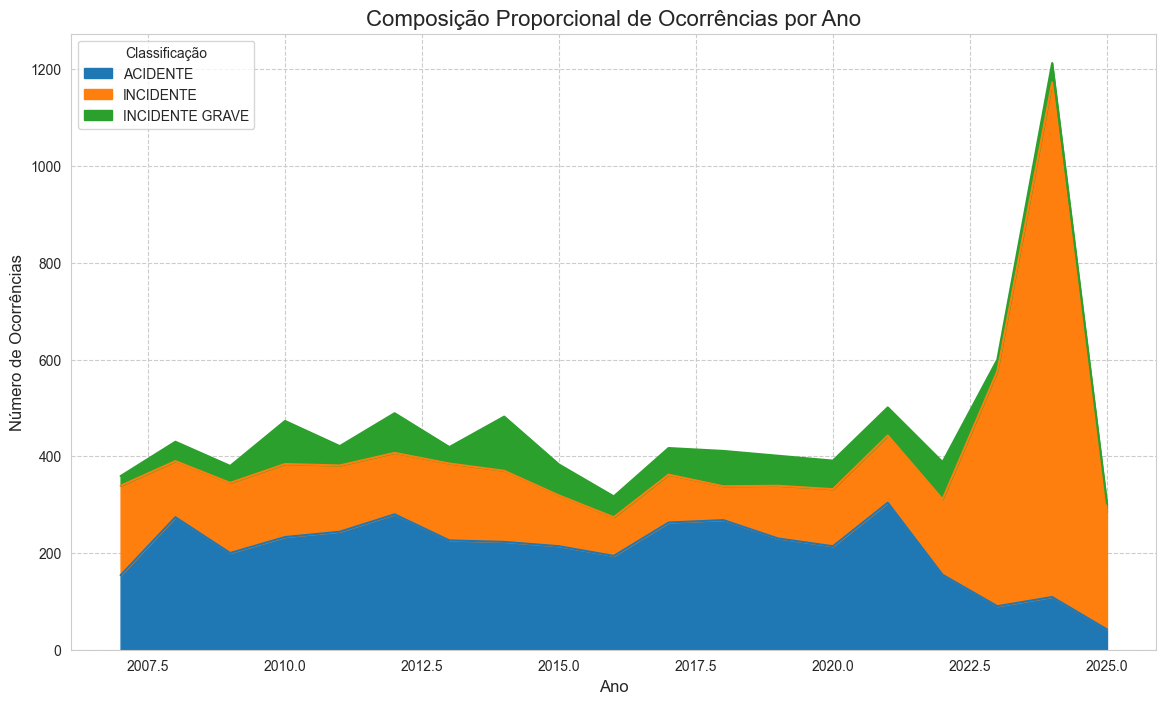
---

## 🗺️ **2. Distribuição Geográfica**

### **Estados com Mais Ocorrências:**
1. **São Paulo (SP)** - 5.032 ocorrências
2. **Rio de Janeiro (RJ)** - 1.723 ocorrências  
3. **Minas Gerais (MG)** - 1.540 ocorrências

### **Insight Chave:**
- Volume absoluto correlacionado com tráfego aéreo
- **Composição da gravidade varia significativamente por estado**
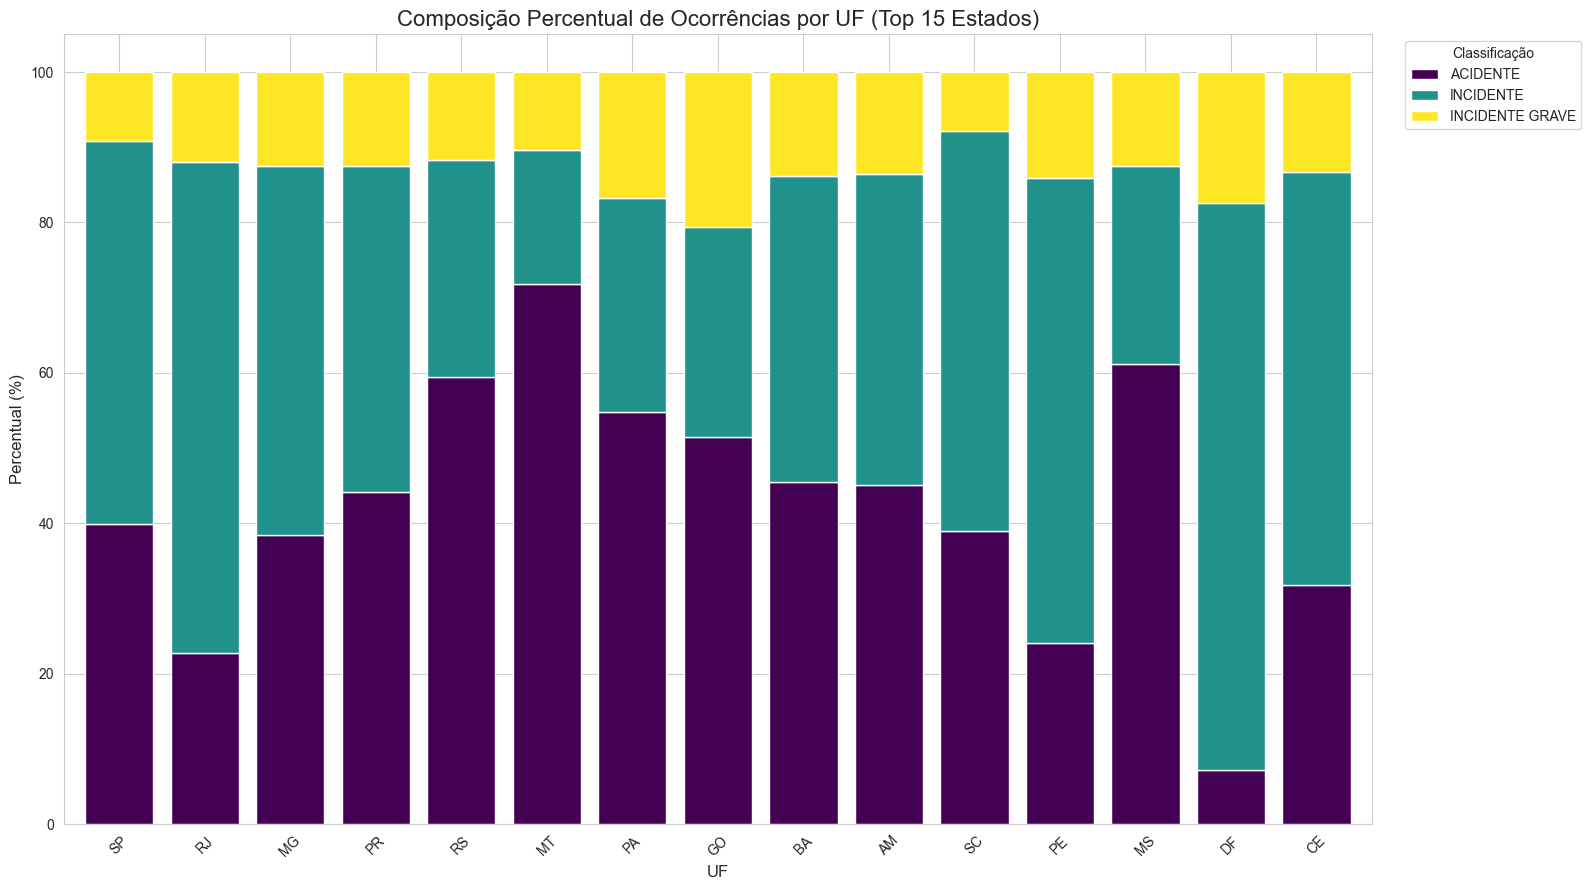
---

## ✈️ **3. Segmento da Aviação - Padrão Crítico Identificado**

### **Proporção de Acidentes por Segmento:**

| **Segmento** | **% Acidentes** | **Nível de Risco** |
|--------------|----------------|---------------------|
| **EXPERIMENTAL** | ~74% | 🔴 **ALTO RISCO** |
| **AGRÍCOLA** | ~88% | 🔴 **ALTO RISCO** |
| **PARTICULAR** | ~63% | 🔴 **ALTO RISCO** |
| **ESPECIALIZADA** | ~73% | 🟡 **MÉDIO RISCO** |
| **REGULAR** | ~5% | 🟢 **BAIXO RISCO** |

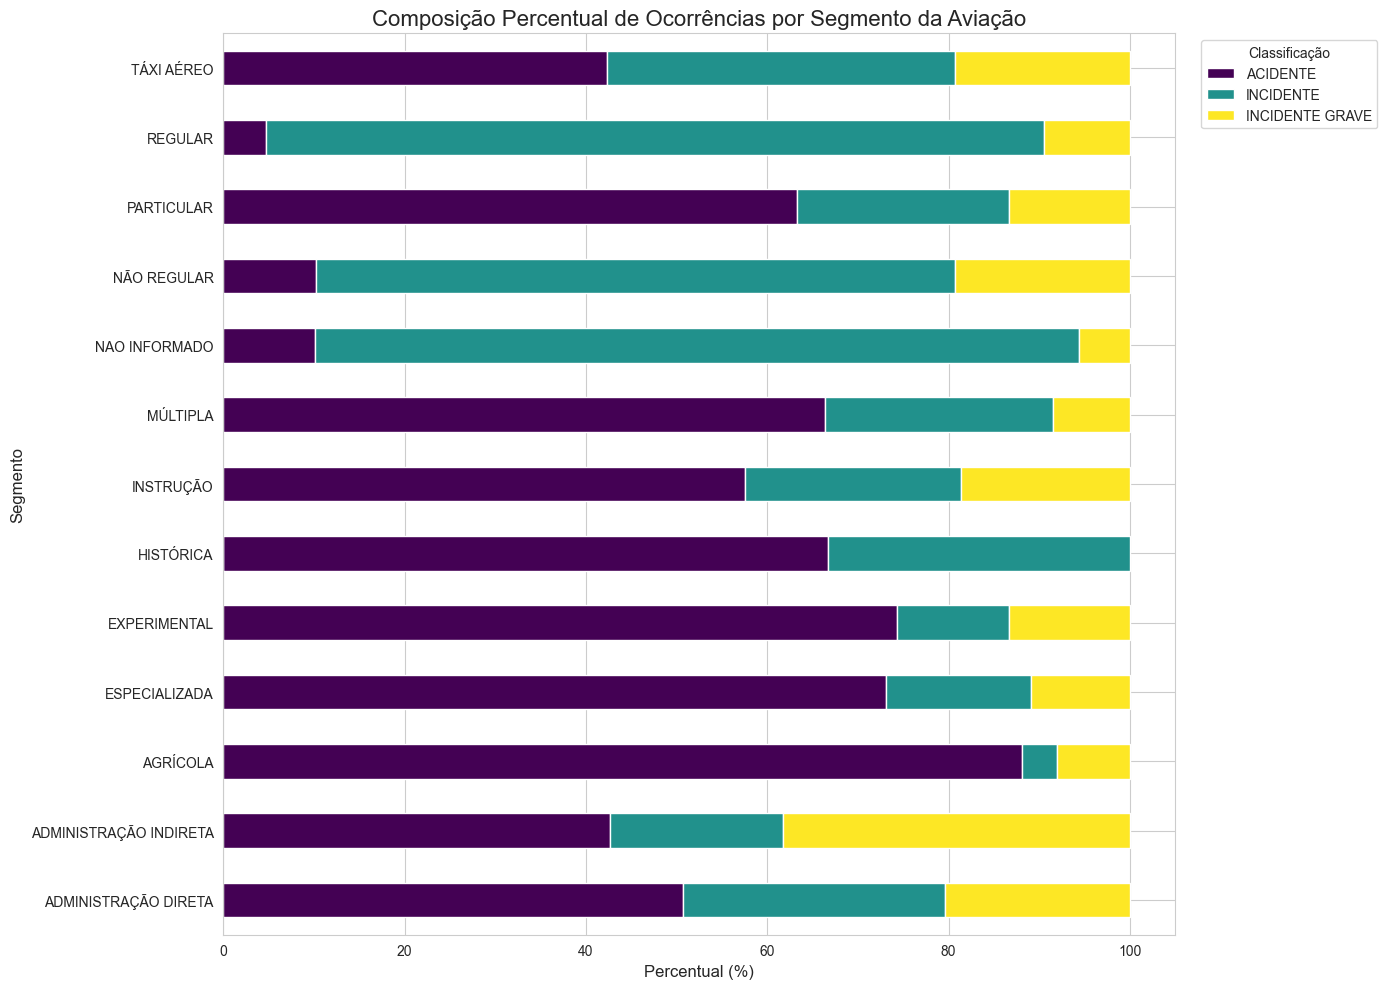

### **Descoberta Fundamental:**
**O segmento da aviação é o preditor mais forte da gravidade das ocorrências**

---

## 🎯 **4. Fases Críticas de Operação**

### **Top 5 Fases com Mais Ocorrências:**
1. **POUSO** - 4.157 ocorrências
2. **DECOLAGEM** - 3.813 ocorrências
3. **CRUZEIRO** - 3.041 ocorrências
4. **APROXIMAÇÃO** - 1.277 ocorrências
5. **SUBIDA** - 1.327 ocorrências

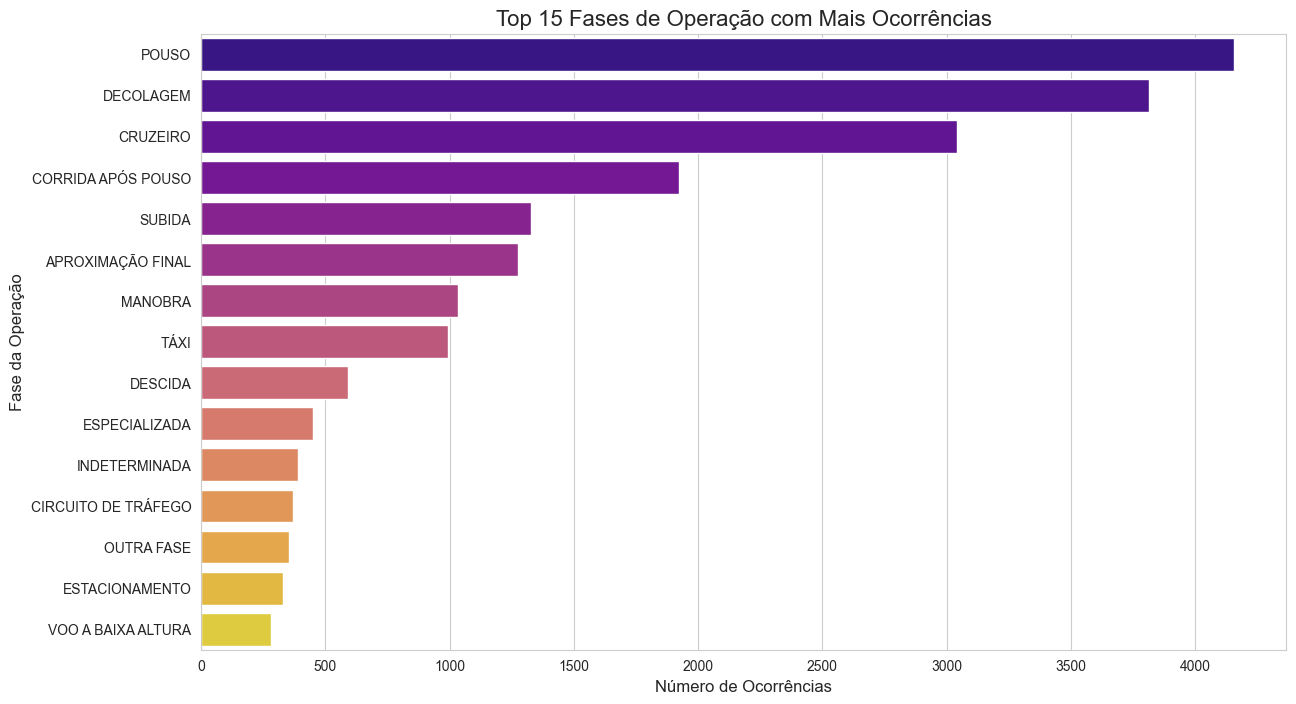

**Confirmação:** Pousos e decolagens continuam sendo as fases mais críticas do voo

# 🤖 5. Resultados do Modelo de Machine Learning

---

## 🎯 **Objetivo da Modelagem**
**Classificar ocorrências como "Grave" ou "Não Grave" para priorização de recursos e resposta**

---

## ⚖️ **Comparação de Algoritmos**

### **Métricas de Performance - Conjunto de Teste:**

| **Métrica** | **Random Forest** | **XGBoost** | **🏆 Vencedor** |
|-------------|-------------------|-------------|-----------------|
| **Acurácia** | **85.10%** | 84.36% | Empate Técnico |
| **Precision (Grave)** | **85%** | 83% | Random Forest |
| **Recall (Grave)** | 90% | **93%** | **🎯 XGBoost** |
| **F1-Score (Grave)** | **88%** | **88%** | Empate Técnico |

---

## 🎯 **Por que XGBoost foi o Modelo Escolhido?**

### **Critério de Decisão: Minimizar Falsos Negativos**
- **Objetivo:** "É melhor acusar grave sem ser, do que não acusar quando é"
- **Métrica Crítica:** **Recall para classe 'Grave'**
- **XGBoost:** 93% de Recall vs 90% do Random Forest
- **Impacto Prático:** Identifica **93 de cada 100 ocorrências graves reais**

---

## 📊 **Performance Final do Modelo**

### **XGBoost - Resultados no Conjunto de Teste:**

| **Classe** | **Precision** | **Recall** | **F1-Score** | **Suporte** |
|------------|---------------|------------|--------------|-------------|
| **Não Grave (0)** | 86% | 73% | 79% | 1.642 |
| **Grave (1)** | 83% | **92%** | 87% | 2.379 |
| **Macro Avg** | 85% | 83% | 83% | 4.021 |
| **Weighted Avg** | 84% | 84% | 84% | 4.021 |

### **🎯 Acurácia Final: 84.21%**

---

## ✅ **Validação da Robustez**
- **Consistência:** Performance praticamente idêntica entre validação e teste
- **Generalização:** Modelo não sofreu overfitting
- **Confiabilidade:** 92% de Recall mantido em dados completamente novos

# 🌐 6. Aplicação Web - Modelo em Produção

---

## 🚀 **Aplicação Streamlit Interativa**

### **Funcionalidades Principais:**

1. **📝 Interface Intuitiva**
   - Formulário para inserção de dados da ocorrência
   - Menus dropdown com opções validadas do dataset
   - Design limpo e profissional

2. **⚡ Predição em Tempo Real**
   - Processamento instantâneo dos dados inseridos
   - Aplicação automática do One-Hot Encoding
   - Predição usando modelo XGBoost treinado

3. **📊 Visualização de Resultados**
   - Classificação clara: "RISCO ALTO" vs "RISCO BAIXO"
   - Probabilidades detalhadas para ambas as classes
   - Código de cores para feedback visual imediato

---

## 🎛️ **Como Usar a Aplicação**

### **Passos para Execução:**

```bash
# 1. Instalar dependências
pip install streamlit pandas joblib scikit-learn xgboost

# 2. Executar a aplicação
streamlit run app.py

# 3. Acessar no navegador
http://localhost:8501
```

---

## 💻 **Exemplo de Uso Prático**

### **Cenário Típico:**
- **Usuário:** Operador do CENIPA
- **Situação:** Nova ocorrência reportada
- **Dados Inseridos:**
  - Estado: São Paulo
  - Tipo: Avião
  - Motor: Jato
  - Segmento: Particular
  - Fase: Decolagem

### **Resultado da Predição:**
- **Classificação:** 🔴 **RISCO ALTO** (probabilidade de ser grave: 59,79%)
- **Ação Recomendada:** Priorizar recursos de investigação

---

## 📁 **Arquivos da Aplicação:**
- **`app.py`** - Interface Streamlit
- **`modelo_cenipa_final.joblib`** - Modelo XGBoost treinado
- **`opcoes_formulario.joblib`** - Opções para menus dropdown

# 🎯 7. Conclusões e Impacto do Projeto

---

## ✅ **Principais Resultados Alcançados**

### **1. Insights Valiosos sobre Segurança Aeronáutica**
- 📊 **Identificação do impacto regulatório:** Pico de 2024 explicado por melhorias no sistema de notificação
- 🗺️ **Mapeamento de riscos por segmento:** Aviação geral 4x mais propensa a acidentes que aviação comercial
- ⚠️ **Confirmação científica:** Decolagem e pouso continuam sendo as fases mais críticas

### **2. Modelo Preditivo Robusto**
- 🎯 **84.21% de acurácia** geral
- 🚨 **92% de recall para ocorrências graves** - critério mais importante para segurança
- ⚖️ **Modelo generaliza bem** - performance consistente entre validação e teste

### **3. Sistema End-to-End Funcional**
- 🔄 **Pipeline completo:** ETL → EDA → Modelagem → Deploy
- 🌐 **Aplicação web interativa** pronta para uso operacional
- 📦 **Código reproduzível** e bem documentado

---

## 🎯 **Aplicações Práticas para Segurança Aérea**

### **Para o CENIPA:**
- **⚡ Triagem Automática:** Priorização imediata de recursos de investigação
- **📊 Análise de Tendências:** Monitoramento contínuo de padrões de risco
- **🎯 Alocação de Recursos:** Foco em segmentos e regiões de maior risco

### **Para Operadores Aéreos:**
- **🔍 Autoavaliação:** Análise do perfil de risco de suas operações
- **📋 Prevenção:** Identificação proativa de cenários de alto risco
- **📈 Benchmarking:** Comparação com padrões do setor

---

## ⚠️ **Limitações e Considerações**

### **Limitações Identificadas:**
- **📅 Mudanças Regulatórias:** Modelo pode precisar de recalibração após mudanças significativas
- **🌍 Contexto Regional:** Validação adicional necessária para outros países
- **📊 Desbalanceamento:** Alguns segmentos têm poucos dados para análise robusta

### **Mitigações Aplicadas:**
- **🔄 Estratificação adequada** nos conjuntos de treino/teste
- **⚖️ Class weight balancing** no modelo
- **📝 Documentação clara** das limitações

---

## 🚀 **Próximos Passos e Melhorias Futuras**

### **Roadmap de Desenvolvimento:**
- **☁️ Deploy em Nuvem:** Heroku ou Streamlit Cloud para acesso global
- **📊 Dashboard Analítico:** Visualizações executivas para tomada de decisão
- **📈 Análise Temporal:** Modelos de séries temporais para forecasting

---

## 💡 **Impacto Esperado**
**Este projeto demonstra como ciência de dados pode ser aplicada de forma prática e imediata para melhorar a segurança da aviação no Brasil, fornecendo uma ferramenta objetiva e confiável para apoiar decisões críticas de segurança operacional.**

# 🙏 Agradecimentos e Informações do Projeto

---

## 📚 **Informações Acadêmicas**

### **🏛️ Instituição:**
**Universidade Federal de Sergipe (UFS)**

### **👨‍🏫 Disciplina:**
**Tópicos de Inteligência Artificial 2025.1**

### **👥 Equipe de Desenvolvimento:**
- **Charlie Rodrigues Fonseca**
- **Elana Tanan Sande**

---

## 🛠️ **Tecnologias Utilizadas**

### **Análise de Dados e ML:**
- **Python** - Linguagem principal
- **Pandas** - Manipulação e análise de dados
- **Matplotlib & Seaborn** - Visualização
- **Scikit-learn** - Pré-processamento e métricas
- **XGBoost** - Algoritmo final do modelo

### **Aplicação Web:**
- **Streamlit** - Framework da interface
- **Joblib** - Serialização do modelo

### **Desenvolvimento:**
- **Jupyter Notebook** - Ambiente de análise
- **VS Code** - Editor de código
- **Git & GitHub** - Controle de versão

---

## 📁 **Repositório do Projeto**

### **🔗 GitHub:** 
```
https://github.com/charlierf/desafio-di2win
```

### **📂 Estrutura de Arquivos:**
- `01_ETL_cenipa.ipynb` - Processo ETL
- `02_EDA_cenipa.ipynb` - Análise exploratória  
- `03_Modelagem_Preditiva_CENIPA.ipynb` - Machine Learning
- `app.py` - Aplicação Streamlit
- `data/` - Datasets originais e processados
- `README.md` - Documentação completa

---

## 🎯 **Desafio Di2win**

Este projeto foi desenvolvido como parte do **Desafio de Ciência de Dados da Di2win**, demonstrando a aplicação prática de técnicas avançadas de ciência de dados em um problema real de segurança pública.

---

# ✈️ **Obrigado pela Atenção!**

### 🤝 **Dúvidas e Contato**
Estamos disponíveis para esclarecer qualquer aspecto técnico ou metodológico do projeto.

In [1]:
# Configuração para apresentação em slides
# Execute esta célula para configurar o notebook como apresentação de slides

# Para converter este notebook em slides, execute no terminal:
# jupyter nbconvert Apresentacao_Projeto_CENIPA.ipynb --to slides --post serve

# Ou instale o RISE para apresentar diretamente no Jupyter:
# pip install RISE
# jupyter-nbextension install rise --py --sys-prefix
# jupyter-nbextension enable rise --py --sys-prefix

print("📋 Notebook de Apresentação - Projeto CENIPA")
print("🎯 Análise de Dados de Ocorrências Aeronáuticas")
print("")
print("📚 Para melhor visualização:")
print("1. Use o modo 'Slideshow' do Jupyter")
print("2. Ou converta para HTML slides com nbconvert")
print("3. Cada célula markdown representa um slide")
print("")
print("✅ Apresentação pronta!")
print("🚀 Total de slides: 8")

📋 Notebook de Apresentação - Projeto CENIPA
🎯 Análise de Dados de Ocorrências Aeronáuticas

📚 Para melhor visualização:
1. Use o modo 'Slideshow' do Jupyter
2. Ou converta para HTML slides com nbconvert
3. Cada célula markdown representa um slide

✅ Apresentação pronta!
🚀 Total de slides: 8
